In [10]:
import matplotlib.pyplot as plt
import json
import numpy as np

In [11]:
with open("GraalVM_matrix.json") as f:
    graal = json.loads(f.read())["matrix"]
with open("HotSpot_matrix.json") as f:
    hotspot = json.loads(f.read())["matrix"]


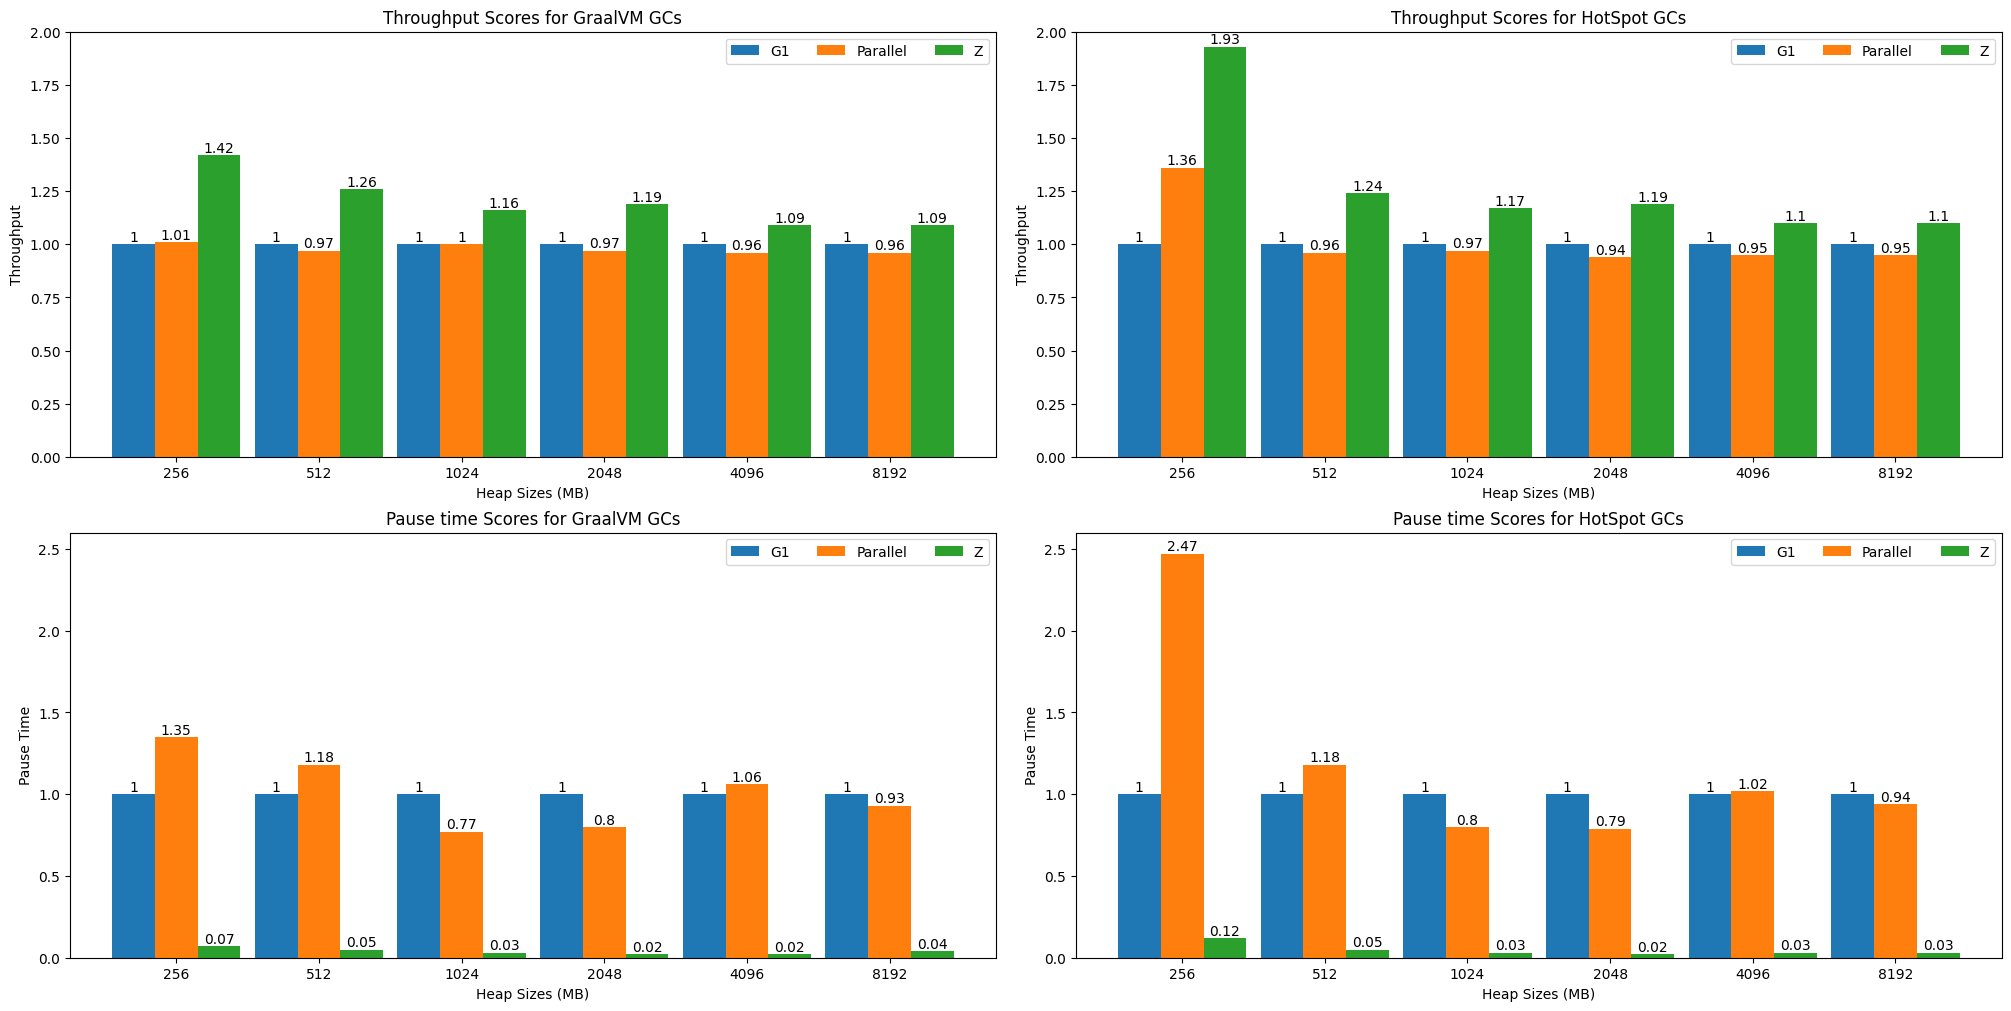

In [57]:
def plot(layout=None):
    x_labels = list(graal.keys())
    x = np.arange(len(x_labels))
    fig, axs = plt.subplots(2, 2, figsize=(20, 10), layout=layout)
    
    gcs = graal[x_labels[0]]
    def plot_sub_graph(ax, key, d, gcs, title, y_label, y_limit):
        width = 0.3
        multiplier = 0
        for gc in gcs:
            values = [value[gc][key] for value in d.values()]
            offset = width * multiplier
            rects = ax.bar(x + offset, values, width, label=gc)
            ax.bar_label(rects)
            multiplier += 1
            ## Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel(y_label)
            ax.set_xlabel("Heap Sizes (MB)")
            ax.set_title(title)
            ax.set_xticks(x + width, x_labels)
            ax.legend(ncols=3)
            ax.set_ylim(0, y_limit)
            #fig.savefig("matrix_graph.png")
            
    plot_sub_graph(axs[0][0], "throughput", graal, gcs, "Throughput Scores for GraalVM GCs", "Throughput", 2)
    plot_sub_graph(axs[0][1], "throughput", hotspot, gcs, "Throughput Scores for HotSpot GCs", "Throughput", 2)
    plot_sub_graph(axs[1][0], "pause_time", graal, gcs, "Pause time Scores for GraalVM GCs", "Pause Time", 2.6)
    plot_sub_graph(axs[1][1], "pause_time", hotspot, gcs, "Pause time Scores for HotSpot GCs", "Pause Time",2.6 )
    
plot("constrained")